In [1]:
## This file contains the basic function of read data and clean filter.
## Author: Xiang Li

###Sample
#### Imput Package
import pandas as pd
import numpy as np
import os

In [2]:
###PLot package
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

In [3]:
def generate_Upregulated_Genes(Input_Path):
    #### READ FILE
    df = pd.read_csv(Input_Path, sep='\t', header=0, usecols={'gene_id',\
    'status','sample_1','sample_2', 'value_1','value_2','log2(fold_change)','p_value','q_value'})
    #### Filter
    
    df=df[
    (df['status']=='OK') & (df['q_value']<0.05) & (df['value_1']>0)\
   & (df['value_2']>0) & (df['log2(fold_change)'] > np.log2(1.5))
    ]
    
    #### Rearrange Columns
    
    df=df.rename(columns={'value_1': df['sample_1'].unique()[0], 'value_2': df['sample_2'].unique()[0]})
    df=df.set_index('gene_id')
    #### Output
    
    return df.loc[:,[df['sample_1'].unique()[0],df['sample_2'].unique()[0],'log2(fold_change)','p_value','q_value']]

In [4]:
def generate_Downregulated_Genes(Input_Path):
    #### READ FILE FROM CuffDiff Results
    df = pd.read_csv(Input_Path, sep='\t', header=0, usecols={'gene_id',\
    'status','sample_1','sample_2', 'value_1','value_2','log2(fold_change)','p_value','q_value'})
    #### Filter
    df=df[
    (df['status']=='OK') & (df['q_value']<0.05) & (df['value_1']>0)\
   & (df['value_2']>0) & (df['log2(fold_change)']< np.log2( 2.0/3.0))
    ]
    
    #### Rearrange Columns
    
    df=df.rename(columns={'value_1': df['sample_1'].unique()[0], 'value_2': df['sample_2'].unique()[0]})
    df=df.set_index('gene_id')
    #### Output
    return df.loc[:,[df['sample_1'].unique()[0],df['sample_2'].unique()[0],'log2(fold_change)','p_value','q_value']]

In [5]:
#### Generate INPUT PATH

#os.makedirs(os.getcwd()+'/genelist/')
PATH_FOLDER=os.getcwd()+ '/CuffDiff_Results/'
INPUT_LIST=os.listdir(PATH_FOLDER)
for input_name in INPUT_LIST:
    INPUT_PATH = PATH_FOLDER+input_name+'/gene_exp.diff'
    print ('Library:' + input_name)
    df_up = generate_Upregulated_Genes(INPUT_PATH)
    df_up.to_csv( os.getcwd()+'/genelist/up_'+input_name +'.bed' ,sep='\t')
    print ('# of Up:' )
    print(df_up.shape)
    
    df_down = generate_Downregulated_Genes(INPUT_PATH)  
    df_down.to_csv( os.getcwd()+'/genelist/down_'+input_name + '.bed' ,sep='\t')
    print ('# of Down')
    print(df_down.shape)
    print ('')


Library:Ctrl_3n_4n_DKO_CD8_0h_1_2_4n
# of Up:
(1715, 5)
# of Down
(1666, 5)

Library:DKO_0h_DKO_72h
# of Up:
(1600, 5)
# of Down
(1106, 5)

Library:WT_0h_DKO_0h
# of Up:
(732, 5)
# of Down
(764, 5)

Library:WT_0h_WT_72h
# of Up:
(1960, 5)
# of Down
(1357, 5)

Library:WT_72h_DKO_72h
# of Up:
(474, 5)
# of Down
(802, 5)



'Intersection_up_WT_0h_DKO_0h_up_Ctrl_3n_4n_DKO_CD8_0h_1_2_4n'

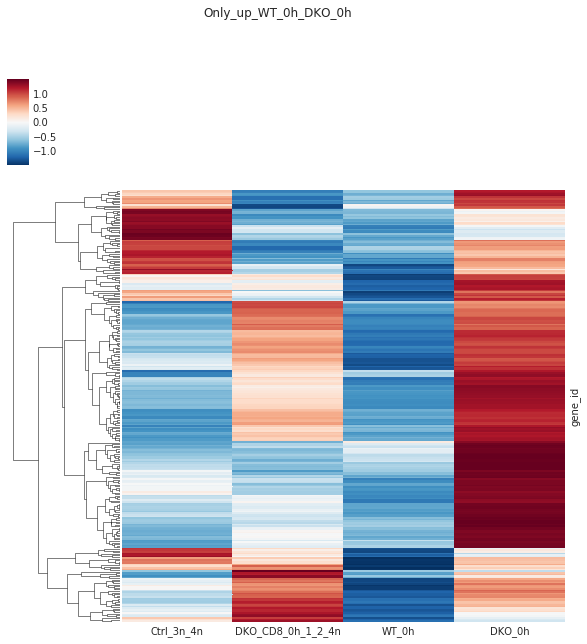

In [162]:
#### merge into an imported gene_list and plot heat map

def Rename_column(Path):
    df = pd.read_csv(Path,sep='\t', header=0, usecols={'gene_id','sample_1','sample_2','value_1','value_2'})
    return df.rename(columns={'value_1': df['sample_1'].unique()[0],'value_2': df['sample_2'].unique()[0]})

PATH_FOLDER=os.getcwd()+ '/CuffDiff_Results/'
INPUT_LIST= ['Ctrl_3n_4n_DKO_CD8_0h_1_2_4n', 'WT_0h_DKO_0h']

INPUT_PATH_1 = PATH_FOLDER + INPUT_LIST[0] +'/gene_exp.diff'
df1=Rename_column(INPUT_PATH_1)

INPUT_PATH_2 = PATH_FOLDER + INPUT_LIST[1] +'/gene_exp.diff'
df2=Rename_column(INPUT_PATH_2)
df2=df2.rename(columns={'Ctrl-n':'WT_0h', 'dKO-n':'DKO_0h'})


RPKM_two_groups=df1.loc[:,['gene_id','Ctrl_3n_4n','DKO_CD8_0h_1_2_4n']].merge(df2.loc[:,['gene_id','WT_0h','DKO_0h']], on='gene_id',how='inner')


genelist_name='Only_up_WT_0h_DKO_0h'
gene_list_path=os.getcwd()+'/Resource/Ref_1/Up_Results/'+genelist_name + '.bed'


plot_gene_list=pd.read_csv(gene_list_path)

RPKM_two_groups=RPKM_two_groups.merge(plot_gene_list, on='gene_id', how='inner')

RPKM_two_groups=RPKM_two_groups.set_index('gene_id')


fig_1 = sns.clustermap( RPKM_two_groups,  yticklabels=False, col_cluster=False,\
z_score=0, cmap="RdBu_r", row_cluster=True) # 

fig_1.fig.suptitle(genelist_name)


In [164]:
RPKM_two_groups.sort_values(by=['Ctrl_3n_4n', 'DKO_CD8_0h_1_2_4n'])

,Ctrl_3n_4n,DKO_CD8_0h_1_2_4n,WT_0h,DKO_0h
gene_id,,,,
Capn11,0.000000,1.817610,0.616529,1.552720
Ccl3,0.000000,13.240000,0.217271,8.188850
Ifng,0.000000,14.660400,2.228640,6.687630
Fasl,0.014131,112.082000,0.613247,74.266400
Metrnl,0.020696,7.164450,0.157493,3.220140
Rasl11a,0.026514,0.990812,0.194456,0.833158
Cdkn1a,0.027444,30.663000,0.534723,3.279010
Heatr9,0.028363,10.942600,0.066238,9.462130
5830416I19Rik,0.038629,0.088780,0.529512,1.792000


In [58]:
#### Generate INPUT PATH

PATH_FOLDER=os.getcwd()
INPUT_LIST= ['Ctrl_3n_4n_DKO_CD8_0h_1_2_4n', 'WT_0h_DKO_0h']

INPUT_PATH = PATH_FOLDER+'/genelist/all_libs/down_'+INPUT_LIST[0] +'.bed'

genelist1 = pd.read_csv(INPUT_PATH,sep='\t')
genelist1=genelist1.set_index('gene_id')

INPUT_PATH = PATH_FOLDER+'/genelist/all_libs/down_'+INPUT_LIST[1] +'.bed'
genelist2 = pd.read_csv(INPUT_PATH,sep='\t')
genelist2 = genelist2.set_index('gene_id')
genelist2

#genelist1.index.intersection(genelist2.index)

genelist2.index.intersection(genelist1.index)
#idx1.intersection(idx2)
genelist1.iloc[:,[0,1]]
genelist2.iloc[:,[0,1]]


#### Union
genelist_all = genelist1.iloc[:,[0,1]].merge(genelist2.iloc[:,[0,1]],
how='outer',left_index=True, right_index=True)

print(genelist_all.shape)


#### intersection
intersection_genelists = pd.DataFrame(index=genelist_all.index)
intersection_genelists = intersection_genelists.merge ( genelist1.iloc[:,[0,1]],how='inner',left_index=True, right_index=True)
intersection_genelists = intersection_genelists.merge ( genelist2.iloc[:,[0,1]],how='inner',left_index=True, right_index=True)

print(intersection_genelists.shape)
intersection_genelists.to_csv(os.getcwd()+'/genelist/Overlap_up_genes_'+ '.bed', columns=[],sep='\t')




(2022, 4)
(408, 4)


(2022, 4)
(408, 4)


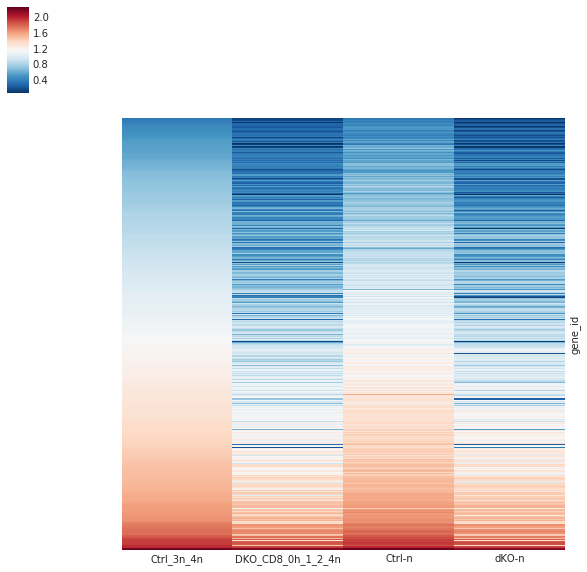

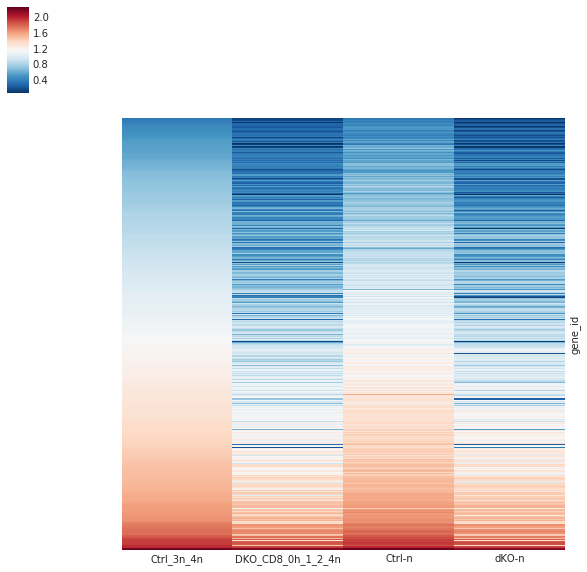

In [6]:
#### Generate INPUT PATH

PATH_FOLDER=os.getcwd()
INPUT_LIST= ['Ctrl_3n_4n_DKO_CD8_0h_1_2_4n', 'WT_0h_DKO_0h']

INPUT_PATH = PATH_FOLDER+'/genelist/down_'+INPUT_LIST[0] +'.bed'

genelist1 = pd.read_csv(INPUT_PATH,sep='\t')
genelist1=genelist1.set_index('gene_id')

INPUT_PATH = PATH_FOLDER+'/genelist/down_'+INPUT_LIST[1] +'.bed'
genelist2 = pd.read_csv(INPUT_PATH,sep='\t')
genelist2 = genelist2.set_index('gene_id')
genelist2

#genelist1.index.intersection(genelist2.index)

genelist2.index.intersection(genelist1.index)
#idx1.intersection(idx2)
genelist1.iloc[:,[0,1]]
genelist2.iloc[:,[0,1]]


#### intersection
genelist_all = genelist1.iloc[:,[0,1]].merge(genelist2.iloc[:,[0,1]],
how='outer',left_index=True, right_index=True)

print(genelist_all.shape)


#### union
union_genelists = pd.DataFrame(index=genelist_all.index)
union_genelists = union_genelists.merge ( genelist1.iloc[:,[0,1]],how='inner',left_index=True, right_index=True)
union_genelists = union_genelists.merge ( genelist2.iloc[:,[0,1]],how='inner',left_index=True, right_index=True)

print(union_genelists.shape)



fig_1 = sns.clustermap( np.log1p(np.log1p(genelist_all.dropna().sort_values(by=['Ctrl_3n_4n']))),  yticklabels=False, col_cluster=False,\
z_score=None, cmap="RdBu_r", row_cluster=False) # 

fig_2 = sns.clustermap( np.log1p(np.log1p(union_genelists.sort_values(by=['Ctrl_3n_4n']))),  yticklabels=False, col_cluster=False,\
z_score=None, cmap="RdBu_r", row_cluster=False) # 

In [98]:
#### Union and find intersection and left only 


PATH_FOLDER=os.getcwd()
Merge_Column='gene_id'
INPUT_LIST= ['Ctrl_3n_4n_DKO_CD8_0h_1_2_4n', 'WT_0h_DKO_0h']

INPUT_PATH = PATH_FOLDER+'/genelist/all_libs/down_'+INPUT_LIST[0] +'.bed'
genelist1 = pd.read_csv(INPUT_PATH,sep='\t')

INPUT_PATH = PATH_FOLDER+'/genelist/all_libs/down_'+INPUT_LIST[1] +'.bed'
genelist2 = pd.read_csv(INPUT_PATH,sep='\t')


### Union A and B, use indicator to differentiate them.
union_A_B=genelist1.loc[:, [Merge_Column]].merge(genelist2.loc[:,[Merge_Column]], how='outer', indicator=True)

intersection_A_B=union_A_B[union_A_B['_merge']=='both']
intersection_A_B.to_csv(PATH_FOLDER+'/intersection'+'Input_A'+'_B.bed',index=None, columns=[Merge_Column])

only_A=union_A_B[union_A_B['_merge']=='left_only']
only_B=union_A_B[union_A_B['_merge']=='right_only']


